# Базовая модель

## Описание модели

В модели присутствуют два вида агентов – **n** продавцов и **m** покупателей. В модели рассматривается только один вид товара, все продавцы хотят его продать, все покупатели его купить. 

## Продавцы

У каждого продавца **s** определено минимальное значение цены **s.min_price**, за которую он готов продать товар. Ниже этой цены продавцу невыгодно продавать товар. У разных продавцов значение **s.min_price** может быть разным. У каждого продавца значение **s.min_price** определяется в начале процесса моделирование как случайное число, равномерно распределенное на отрезке **[saller_min, saller_max]**. Величины **saller_min** и **saller_max** одинаковы для всех продавцов и являются параметрами модели.

Также у каждого продавца **s** есть значение ожидаемой цены продажи **s.expect_price**, которая всегда больше или равна, чем **s.min_price**. Изначально **s.expect_price** равно **saller_max**, но в дальнейшем может уменьшаться или увеличиваться на величину **saller_delta**, одинаковую для всех продавцов и являющейся параметром модели. Изменение **s.expect_price** происходит после взаимодействия данного продавца **s** с покупателем. Правила данного изменения будут описаны ниже. 


## Покупатели

У каждого покупателя **с** определено максимальное значение цены **c.max_price**, за которую он готов купить товар. Выше этой цены покупателю невыгодно покупать товар. У разных покупателей значение **c.max_price** может быть разным. У каждого покупателя значение **c.min_price** определяется в начале процесса моделирования как случайное число, равномерно распределенное на отрезке **[consumer_min ,consumer_max]**. Величины **consumer_min** и **consumer_max** одинаковы для всех продавцов и являются параметрами модели.
Также у каждого покупателя есть значение ожидаемой цены продажи **c.expect_price**, которая всегда меньше или равна, чем **c.max_price**. Изначально **c.expect_price** равно **0**, но в дальнейшем может уменьшаться или увеличиваться на величину **consumer_delta**, одинаковую для всех покупателей и являющейся параметром модели. Изменение **c.expect_price** происходит после взаимодействия данного покупателя c продавцом. Правила данного изменения будут описаны ниже. 


## Взаимодействие

На каждом шаге моделирования случайным равновероятным образом выбирается один продавец **s** и один покупатель **c**. Между ними происходит попытка заключения сделки. 

Если **s.expect_price** меньше или равно **c.expect_price** покупателя, то: 
1. сделка происходит,
2. **s.expect_price** увеличивается на **s.delta**,
3. **c.expect_price** уменьшается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки удовлетворяют ожиданиям как продавца, так и покупателя. Реальная стоимость купли-продажи может быть определена как **(s.expect_price + c.expect_price) / 2**, однако в данной модели эта величина никак не учитывается. 

При этом продавец считает, что если он сейчас продал товар за стоимость как минимум **s.expect_price**, то в дальнейшем он может его продать немного дороже и **s.expect_price** можно немного увеличить.

А покупатель считает, что он купил сейчас товар за стоимость не более **c.expect_price**, то в дальнейшем он может покупать товар немного дешевле и **c.expect_price** можно немного уменьшить.

Если **s.expect_price** больше, чем **c.expect_price** покупателя, то:
1. сделка не происходит,
2. **s.expect_price** уменьшается на **s.delta**,
3. **c.expect_price** увеличивается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки не удовлетворяют ожиданиям как продавца, так и покупателя.

При этом продавец считает, что если он сейчас не продал товар за стоимость **s.expect_price**, то для продажи в следующий раз **s.expect_price** надо немного уменьшить.

А покупатель считает, что если он сейчас не смог купить товар за **c.expect_price**, то для покупки в следующий раз **c.expect_price** надо немного увеличить.


## Анализ


Модель на каждом такте должна учитывать:
1. Среднее значение **s.expect_price** по всем продавцам,
2. Минимальное значение **s.expect_price** по всем продавцам,
3. Среднее значение **с.expect_price** по всем покупателям,
4. Максимальное значение **с.expect_price** по всем покупателям,
5. Долю состоявшихся сделок на данный момент.

## Параметры модели


* **n** - количество продавцов, 
* **m** - количество покупателей,
* **[saller_min, saller_max]** – интервал, из которого определяется **s.min_price** для каждого продавца,
* **saller_delta** - величина изменения ожидаемой цены у покупателя,
* **[consumer_min ,consumer_max]** – интервал, из которого определяется **с.max_price** для каждого покупателя,
* **consumer_delta** - величина изменения ожидаемой цены у продавца.


## Технические требования 


* Модель должна быть построена в объектно-ориентированном подходе. Каждый вид агента описывается определенным классом, а каждый агент, соответственно, является объектом данного класса.
* Модель также является классом, в конструктор которого передаются все параметры модели.
* Модель должна иметь метод **run(n)**, который моделирует **n** последующих шагов модели 

## Построение графиков

* Модель должна иметь метод **plot_dynamics(i,j)**, который строит графики анализа поведения моделей на интервале шагов с **i** по **j**.
* Модель должна иметь метод **plot_supply_and_demand(i)**, который строит графики спроса и предложения в момент времени **i**.

## Построение графа (схемы)


Модель должна иметь метод **plot_graph(i, j)**, который строит и визуализирует граф, в котором вершинами являются продавцы и покупатели, а ребра обозначают количество совершенных или не совершенных между ними сделок в периоде с **i** по **j**. Покупатели обозначены синим цветом, продавцы обозначены пурпурным. Зеленые ребра обозначают удачные сделки между продавцом и покупателем. Красные ребра обозначают неудачные сделки. Толщина ребра показывает количество сделок между данными продавцом и покупателем относительно общего количества сделок.

# Реализация базовой модели

## Подключение библиотек

In [150]:
import random
import matplotlib.pyplot as plt
from tqdm import trange # Модуль для визуализации прогресс-бара при запуске модели
!pip install graphviz
import graphviz # Модуль для визуализации графов

## Реализация базовой модели

In [193]:
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # { 
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась
            
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()
            
        else:
            # Сделка не состоялась
            
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()
            

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара
            
            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)
            
            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)
            
            # Моделируем сделку
            self.deal(consumer_id, seller_id)
            

    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''
        
        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию. 
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию. 
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end    
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



## Запуск модели

In [41]:
random.seed(42)
model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(1000)

100%|███████████████████████████████████| 1001/1001 [00:00<00:00, 138450.07it/s]


## Визуализация модели

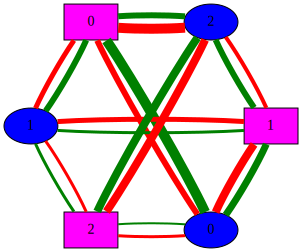

In [42]:
model.plot_graph(100, 200)

## Результаты моделирования

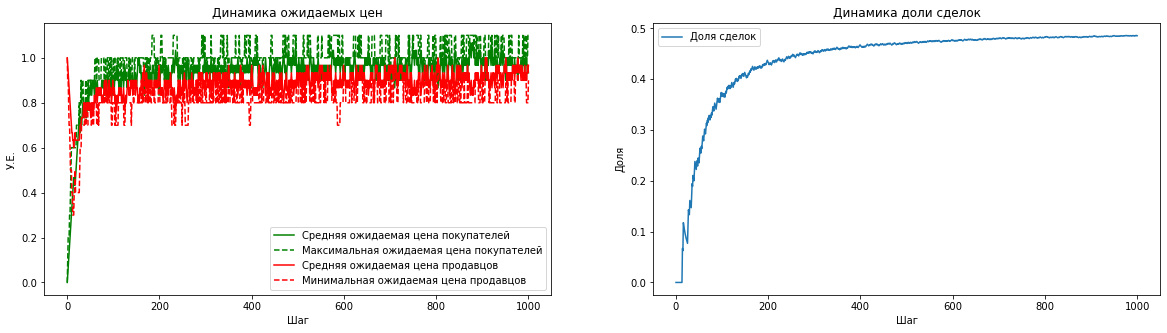

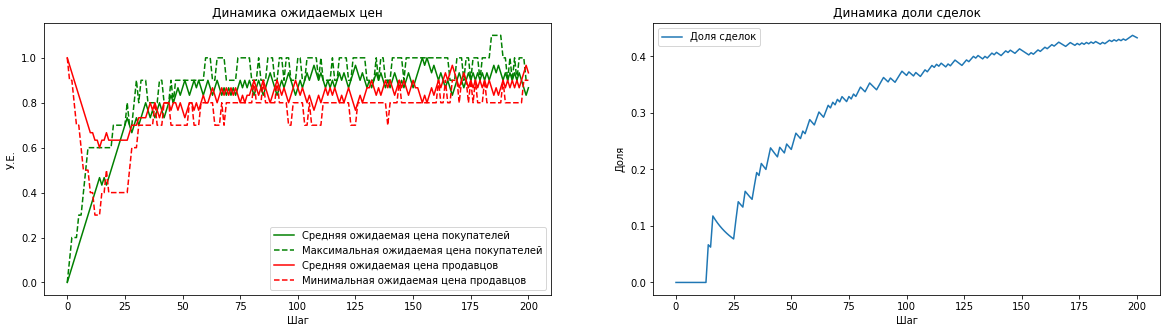

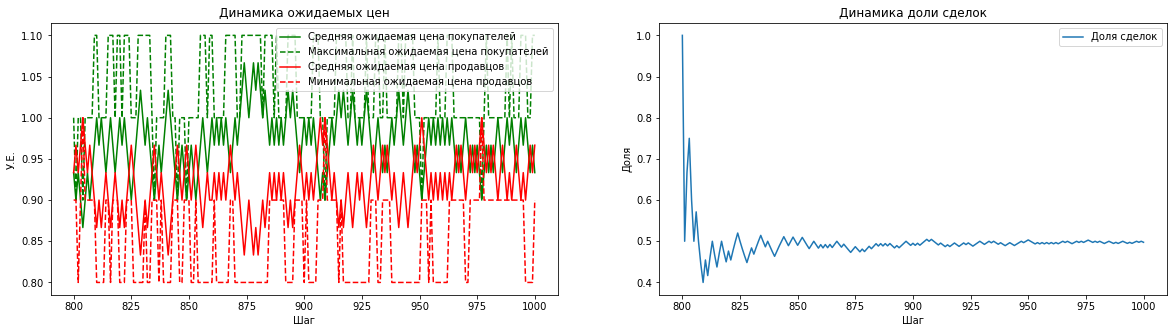

In [43]:
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)

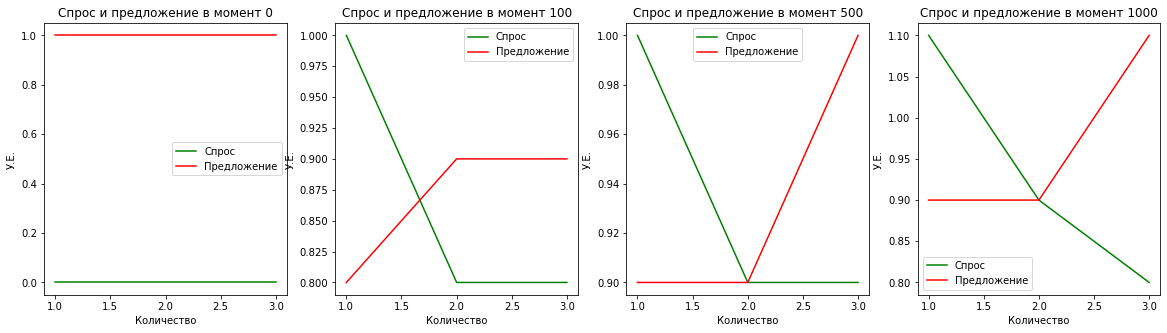

In [44]:
model.plot_supply_and_demand([0, 100, 500, 1000])

## Модель 2

Модифицируем базовую модель. Теперь ожидания покупателей и продавцов меняются только в сторону средней цены предыдущего периода.

Я изменила функцию deal следующим образом: в случае неудачной сделки делала проверку, удалась ли предыдущая сделка, и в таком случае смотрела, была ли предыдущая цена покупателя ниже (в случае продавца выше), и в случае, если это верно, то считала, что агент не меняет цену относительно предыдущего периода в предположении, что ему просто "не повезло"

In [153]:
def mean(lst):
    return sum(lst)/len(lst)


class Model_2:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех покупателей модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех продавцов модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # { 
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась
            
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()
            
        else:
            # Сделка не состоялась
            
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })
            
            # Проверим, был ли предыдцщий период
            if len(self.deals_results) >= 2:
                # Проверим, какая ожидаемая цена была у покупателя в предыдущем периоде и состоялась ли сделка
                if self.deals_results[-2]['result'] == 1 and self.consumers[self.deals_results[-2]['consumer_id']].expect_price >= self.consumers[consumer_id].expect_price:
                    #Так как в предыдущем периоде сделка состоялась, но ожидаемая цена покупателя была не выше, то в этом периоде покупатель считает, что ему просто "не повезло" и не изменяет цену
                    self.consumers[consumer_id].expect_price = self.consumers[consumer_id].expect_price
                else:
                    # Данный покупатель решает увеличить у себя expect_price
                    self.consumers[consumer_id].increase_expect_price()

                # Проверим, какая ожидаемая цена была у покупателя в предыдущем периоде и состоялась ли сделка
                if self.deals_results[-2]['result'] == 1 and self.sellers[self.deals_results[-2]['seller_id']].expect_price <= self.sellers[seller_id].expect_price:
                    #Так как в предыдущем периоде сделка состоялась, но ожидаемая цена покупателя была не ниже, то в этом периоде продавец считает, что ему просто "не повезло" и не изменяет цену
                    self.sellers[seller_id].expect_price = self.sellers[seller_id].expect_price
                else:
                    # Данный продавец решает уменьшить у себя expect_price
                    self.sellers[seller_id].decrease_expect_price()
            else:
                # Данный покупатель решает увеличить у себя expect_price
                self.sellers[seller_id].decrease_expect_price()

                # Данный продавец решает уменьшить у себя expect_price
                self.consumers[consumer_id].increase_expect_price()

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара
            
            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)
            
            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)
            
            # Моделируем сделку
            self.deal(consumer_id, seller_id)
            

    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''
        
        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию. 
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию. 
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end    
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



In [154]:
random.seed(42)
model_2 = Model_2(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model_2.run(1000)

100%|████████████████████████████████████| 1001/1001 [00:00<00:00, 87691.60it/s]


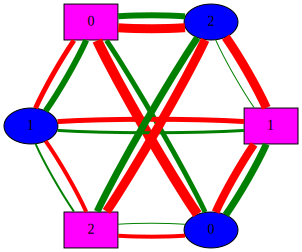

In [155]:
model_2.plot_graph(100, 200)

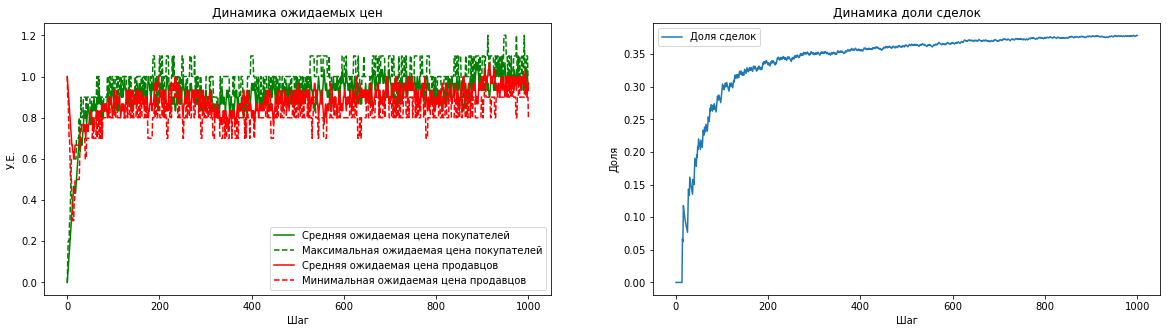

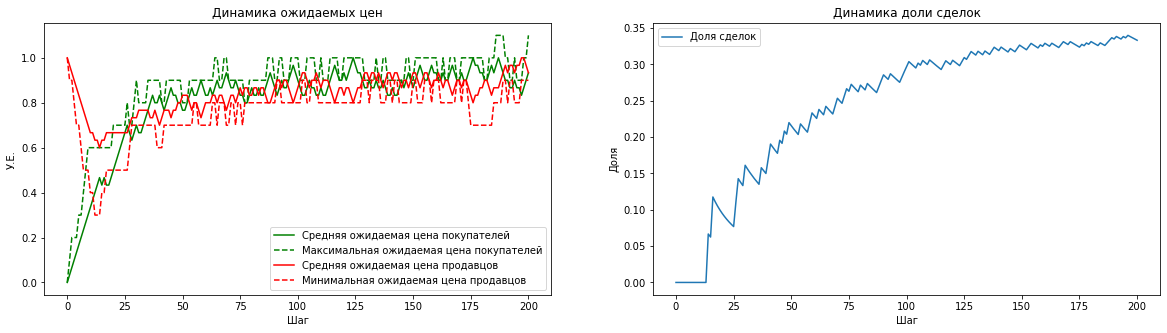

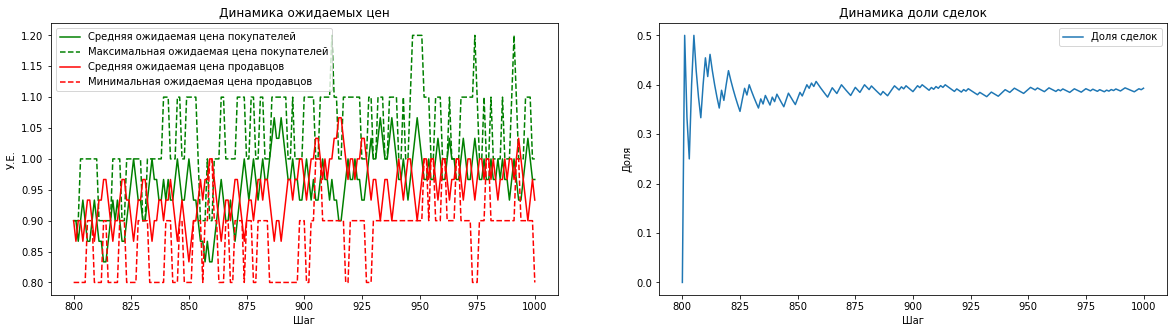

In [156]:
model_2.plot_dynamics(0, 1000)
model_2.plot_dynamics(0, 200)
model_2.plot_dynamics(800, 1000)

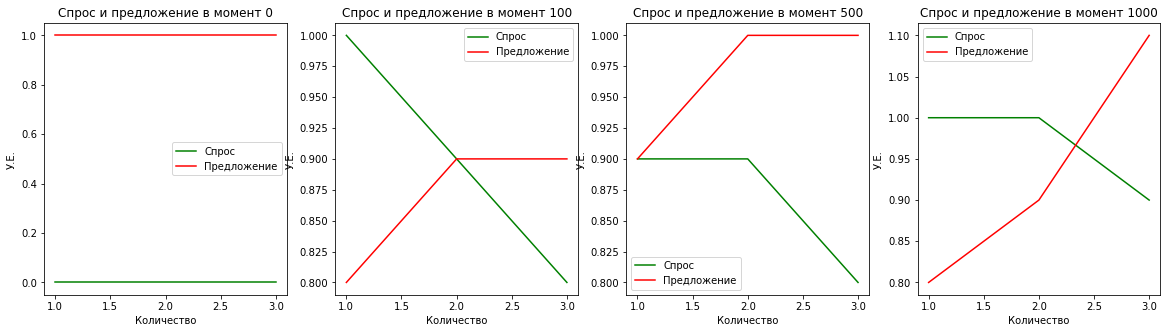

In [157]:
model_2.plot_supply_and_demand([0, 100, 500, 1000])

В отличие от базовой модели, на графике динамики доли сделок более резкие "рывки", что можно объяснить тем, что в данной модели, когда ожидания агентов меняются только в сторону средней цены предыдущего периода, то агентам сложнее "договориться" о цене, так как теперь в случае неудачных сделок они не всегда идут на уступки. Также в данной модели при таких же параметрах на графе связей видно, что удачных сделок стало меньше в сравнении с базовой моделью - это так же объясняется тем, что в случае неудачных сделок как покупатели, так и продавцы теперь не всегда меняют цену. Этим же объясняется менее резкая динамика ожидаемых цен, так как в новой модели агенты реже меняют цену.

## Модель 3

Предположим, что теперь мы рассматриваем последовательные дни, и контакты продавцов и покупателей происходят в течение дня. Количество контактов между продавцами и покупателями в день ограничено константой max_connections, и не меняется в процессе моделирования.

Выделим локальные (внутридневные) параметры, которые меняются и учитываются в течение одного дня. Но на следующий день сбрасываются до исходных значений. 

Модифицируем базовую модель следующим образом: у каждого продавца случайное количество товара, которое он может продать в один день; в конце для излишки сгорают.

1. Добавила в конструктор класса модели новый параметр max_connections - ограничение на количество контактов между продавцами и покупателями в день.
    
2. Добавила в конструктор класса продавца параметры max_connections и num_of_sellers - ограничение на количество контактов между продавцами и покупателями в день и количество продавцов соответственно, также добавила в класс переменные restriction и sales - ограничение на продажи и продажи в определенный момент времени соответственно.
    
3. Добавила в класс модели num_of_deals - список с кол-вом взаимодействий между покупателями и продавцами за определенный день.
    
4. Внесла следующие изменения в функцию run класса модели: ввела счетчик кол-ва сделок продавцов и покупателей дня (которые будут храниться в списке num_of_deals, где num_of_deals[i] - кол-во сделок в день под номером i); в каждой новой итерации цикла с днями обновляла restriction и sales для каждого из покупателей (restriction определялся случайным образом, sales обнулялся, так как нам нужно кол-во продаж в течении конкретного дня и предыдущие дни в текущий период нас не интересуют); случайным образом сгенерировала кол-во контактов за рассматриваемый день и сгенерировала num_of_connections контактов следующим образом: выбрала случайным образом продавца среди тех, кто еще может совершить сделку, и покупателя и смоделировала сделку между ними,в конце итерации цикла с контактами увеличивала счетчик сделок; в конце итерации цикла с днями добавляла кол-во сделок в течение дня в соответствующий список.
    
5. Внесла следующие изменения в функции plot_dynamics, plot_supply_and_demand и plot_graph: теперь вместо разовой сделки мы рассматриваем день и сделки в нем (например, считаем среднюю ожидаемую цену агента за сутки, а не после разовой сделки как в базовой модели).

In [184]:
def mean(lst):
    return sum(lst)/len(lst)


class Model_3:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta, max_connections):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов
            max_connections -- ограничение на количество контактов между продавцами и покупателями в день

        '''
        
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers
        
        # Добавим параметр max_connections
        self.max_connections = max_connections
        
        # Список всех покупателей модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех продавцов модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta, max_connections, num_of_sellers) for _ in range(num_of_sellers)]
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []
        
        # Список результатов сделок. На позиции i находится словарь вида
        # { 
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []
        
        # Введем кол-во взаимодействий в определенный день - i элементу соответствуем кол-во взаимодействий в день i
        self.num_of_deals = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась
            
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })
            
            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()
            
            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()
            
        else:
            # Сделка не состоялась
            
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })
            
            # Данный продавец решает уменьшить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()
            
            # Данный покупатель решает увеличить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()
            

    def run(self, num_of_steps):
        
        # Введем счетчик кол-ва сделок за день
        num_of_deals = 0
        
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps + 1):
            
            self.num_of_deals.append(num_of_deals)
            
            for i in range(len(self.sellers)):
                
                # Обновляем параметры restriction и sales в начале нового дня
                self.sellers[i].restriction = random.randint(int(self.max_connections / self.num_of_sellers), self.max_connections)
                self.sellers[i].sales = 0
            
            # Введем переменную - кол-во контактов в течение дня
            num_of_connections = random.randint(1, self.max_connections)
            
            # Моделируем num_of_connections контактов
            for _ in range(num_of_connections):
                
                # Выбираем продавца среди тех, кто еще может совершить сделку
                while (True):
                    seller_id = random.randint(0, self.num_of_sellers - 1)
                    
                    # Проверка, может ли данный производитель еще что-то продать
                    if self.sellers[seller_id].sales < self.sellers[seller_id].restriction:
                        break
                
                # Выбираем покупателя
                consumer_id = random.randint(0, self.num_of_consumers - 1)
                
                # Моделируем сделку
                self.deal(consumer_id, seller_id)
                
                # Увеличиваем счетчик сделок за день
                num_of_deals += 1
                
        # Добавляем кол-во сделок на момент конца дня в список
        self.num_of_deals.append(num_of_deals)
            

    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на днях от start до end включительно
        '''
        
        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        # Список точек по оси шагов
        steps_range = list(range(self.num_of_deals[start], self.num_of_deals[end+1]))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[self.num_of_deals[start] : self.num_of_deals[end+1]])), color='g', label = "Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[self.num_of_deals[start] : self.num_of_deals[end+1]])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[self.num_of_deals[start] : self.num_of_deals[end+1]])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[self.num_of_deals[start] : self.num_of_deals[end+1]])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")

        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in self.deals_results[self.num_of_deals[start]: self.num_of_deals[end+1]]:
            deals_sum.append(deals_sum[-1] + i['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, len(deals_sum))]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация средних спроса и предложения в дни, указанные в списке pos_list
        '''
        
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))
        

        for i, day in enumerate(pos_list):
            axs[i].title.set_text(f"Спрос и предложение в день {day}")
            
            # Считаем среднюю ожидаемую цену каждого продавца и покупателя за день
            consumers_avg = [0] * self.num_of_consumers
            sellers_avg = [0] * self.num_of_sellers

            for j in range(self.num_of_deals[day], self.num_of_deals[day + 1]):
                for k in range(self.num_of_consumers):
                    consumers_avg[k] += self.consumers_expect_price[j][k] / (self.num_of_deals[day + 1] - self.num_of_deals[day])
                for k in range(self.num_of_sellers):
                    sellers_avg[k] += self.sellers_expect_price[j][k] / (self.num_of_deals[day + 1] - self.num_of_deals[day])

            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(consumers_avg, reverse=True), color='g', label="Спрос")
            
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(sellers_avg), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от дня start до дня end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }
   
        # Для всех моментов времени от start до end 
        for i in range(self.num_of_deals[start], self.num_of_deals[end + 1]):
            
            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta, max_connections, num_of_sellers):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta
        
        # Добавим параметры restrictions и sales - ограничения на продажу и кол-во проданного товара соответственно
        self.restrictions = random.randint(1, max_connections - 1) 
        self.sales = 0

    def increase_expect_price(self):
        self.expect_price += self.delta
        
    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta

In [185]:
random.seed(42)
model_3 = Model_3(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1,
              max_connections = 3)
model_3.run(1000)

100%|████████████████████████████████████| 1001/1001 [00:00<00:00, 41227.63it/s]


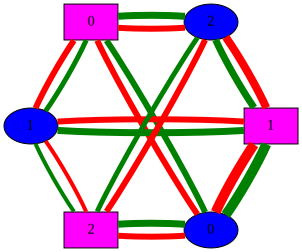

In [186]:
model_3.plot_graph(100, 200)

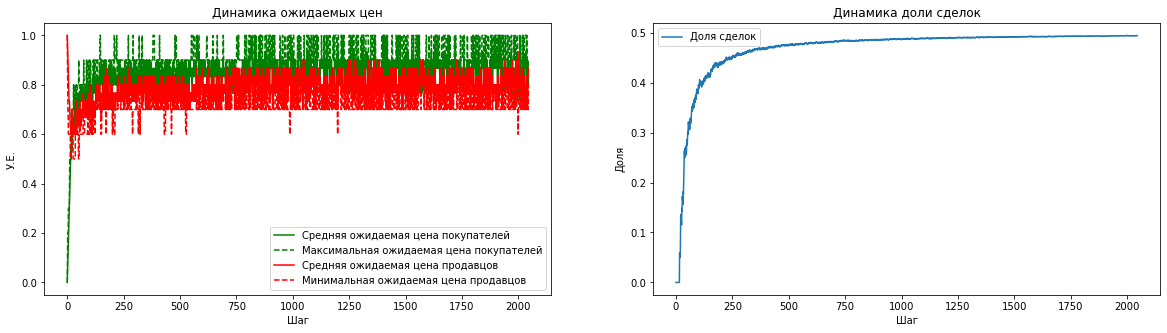

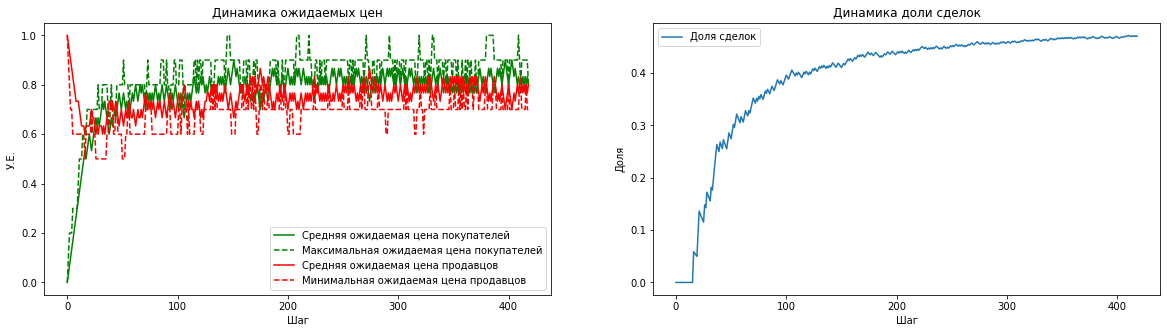

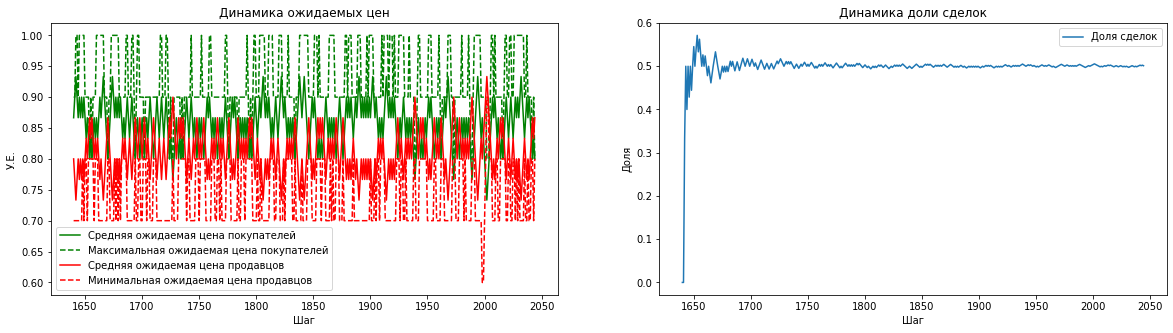

In [187]:
model_3.plot_dynamics(0, 1000)
model_3.plot_dynamics(0, 200)
model_3.plot_dynamics(800, 1000)

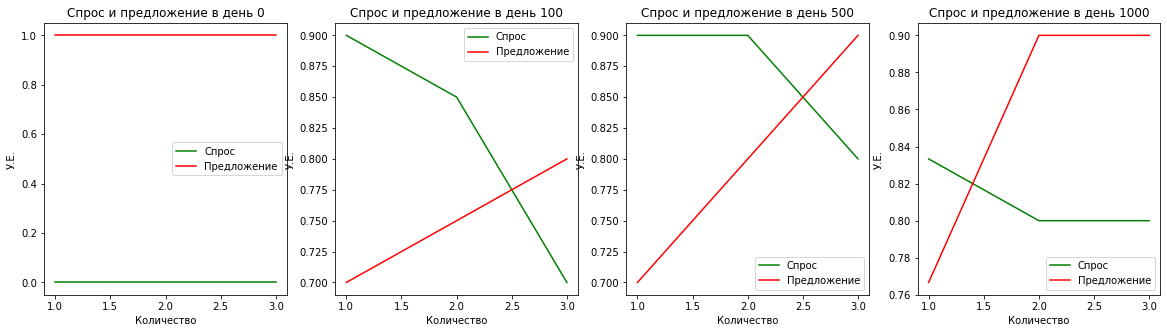

In [188]:
model_3.plot_supply_and_demand([0, 100, 500, 1000])

Теперь продавцы склонны чаще опускать цену, так как им выгоднее продать товар поскорее, чтобы не сгорели излишки, поэтому они будут охотнее идти на уступок. Данное предположение подтвержается графиками - при тех же данных исходной модели (разумеется, за исключением параметра max_connections, так как его в базовой модели не было) границы интервала ожидаемых цен стали ниже, также снизилась величина уровня, на который выходит доля сделок. Также находим подтверждение в графиках предложения - как видно, оно ниже чем при тех же параметрах базовой модели.


## Модель 4 


Из-за того,  что потребление данного товара вызывает негативные экстерналии для общества, государство решает ввести потоварный налог на продавцов следующим образом: у каждого продавца появляется новый параметр - уровень доверия от государства и размер потоварного налога для каждого из продавцов индивидуален и находится в отрицательной зависимости от уровня доверия к продавцу

Я внесла следующие изменения в модель:

1. Добавила в описание класса модели новые параметры: sellers_reputation $\in [1, 10]$ - репутацию продавца и tax_default - параметр в формуле нахождения налога для продавцов

2. Рассчитала потоварный налог для каждого из продавцов по формуле $sellers~tax = \frac{tax~default}{sellers~reputation}$</span>
    
3. Увеличила цены каждого из продавцов на размер их потоварного налога (т.к. продавец платит налог, то, чтобы получить желаемую выручку за продажу товара, он должен продать его за цену, которая на потоварный налог выше желаемой)</span>

In [80]:
def mean(lst):
    return sum(lst)/len(lst)


class Model_4:
    def __init__(self, num_of_consumers, num_of_sellers, tax_default, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta, seller_reputation):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            tax_default -- параметр в формуле нахождения налога для продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов
            seller_reputation -- репутация продавцов

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех покупателей модели 
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех продавцов модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        # Создадим список, в котором будут храниться размеры потоварного налога для каждого из продавцов
        self.sellers_tax = [0] * len(self.sellers)
        
        # Рассчитаем значение налога для каждого из продавцов:
        for i in range(0, len(self.sellers)):
            self.sellers_tax[i] = tax_default / seller_reputation[i]
        
        # Увеличим цены продацов на размер их потоварного налога
        for i in range(0, len(self.sellers)):
            self.sellers[i] = Seller(seller_min + self.sellers_tax[i], seller_max + self.sellers_tax[i], seller_delta)
            
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # { 
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась
            
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()
            
        else:
            # Сделка не состоялась
            
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()
            

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара
            
            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)
            
            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)
            
            # Моделируем сделку
            self.deal(consumer_id, seller_id)
            

    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''
        
        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию. 
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию. 
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end    
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



<span style="color:blue">Продемонстрируем работу модели и сделаем ее визуализацию</span>

In [89]:
random.seed(42)
model_4 = Model_4(num_of_consumers=3,
              num_of_sellers=3,
              tax_default = 0.8,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1,
              seller_reputation = [1, 2, 3])
model_4.run(1000)

100%|███████████████████████████████████| 1001/1001 [00:00<00:00, 253854.42it/s]


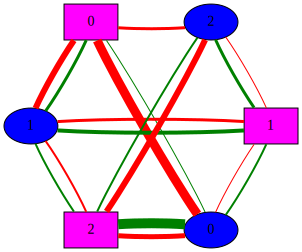

In [90]:
model_4.plot_graph(100, 200)

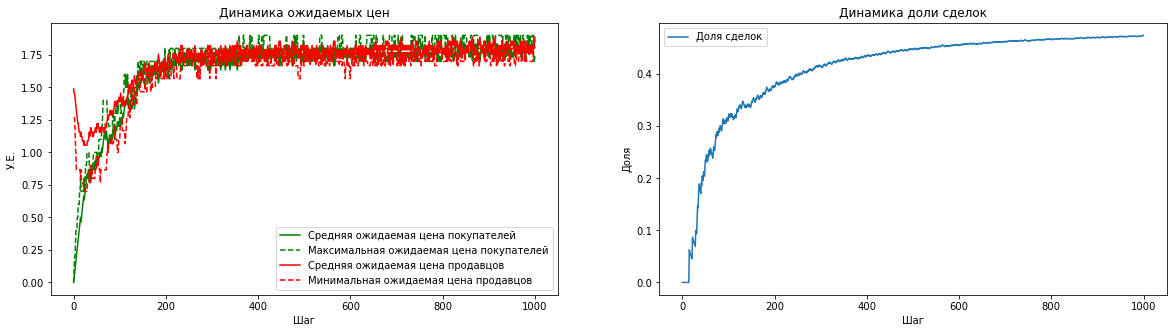

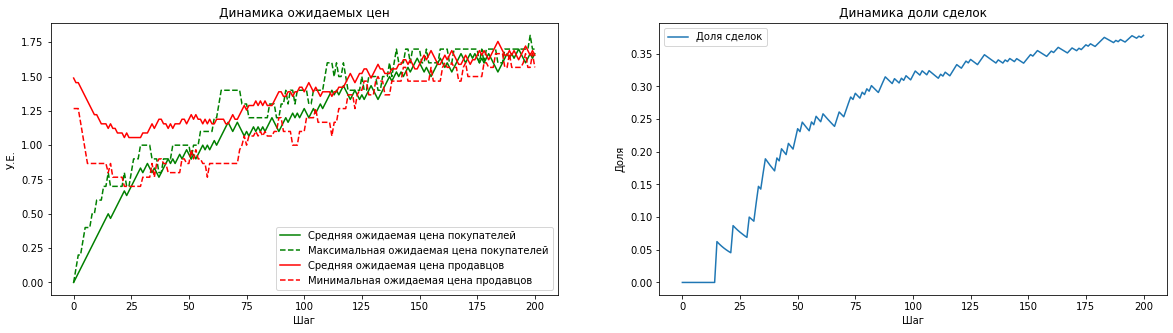

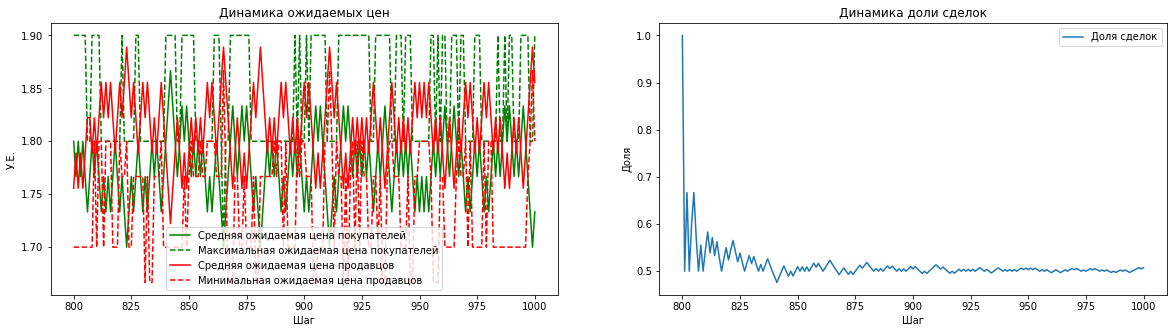

In [91]:
model_4.plot_dynamics(0, 1000)
model_4.plot_dynamics(0, 200)
model_4.plot_dynamics(800, 1000)

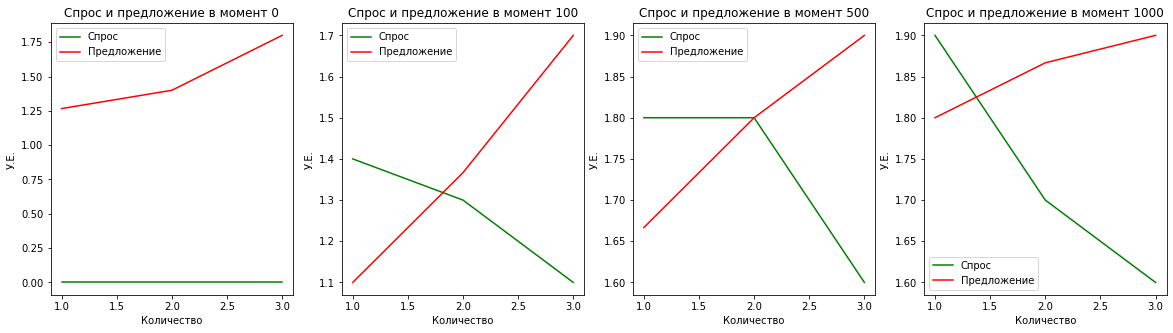

In [92]:
model_4.plot_supply_and_demand([0, 100, 500, 1000])

Видим, что предложение имеет другую тенденцию в каждый момент времени в сравнении с базовой моделью. Это обусловлено тем, что из-за разной репутации продавцов у каждого из них разные возможности продажи товара (кому-то приходится продавать по более высокой цене из-за более высокого налога, чтобы покрыть свои издержки), поэтому у разных продавцов может отличаться функция предложения.</span>

Также видно, что относительно базовой модели с такими же параметрами, но в отсутствие налогов, кол-во несостоявшихся сделок возросло (хорошо видно из диаграмм связей). Данное наблюдение объясняется тем, что из-за введения налогов продавцам пришлось повышать цену, чтобы покрыть свои издержки, поэтому рыночные цены повысились, что заставило покупателей покупать товар в меньшем количестве, так как он стал для них более дорогим.</span>